In [1]:
# import training and testing functions from model.py
# the model is imported then from mode.py
from mode import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os


In [2]:
# inspect data for super resolution task (HR and LR images) / (results and test images)
def inspect_data(HR_path, LR_path, type_end = '.png', sample_images = 3):
    '''
    inspect data for super resolution task (HR and LR images)
    args:
        HR_path : path to high resolution images
        LR_path : path to low resolution images
        type_end : type of images (default = '.png')
        sample_images : number of images to sample (default = 3)
    '''
    if sample_images <1:
        raise ValueError('sample_images must be greater than 0')
    
    directory_HR = os.fsencode(HR_path)
    directory_LW = os.fsencode(LR_path)

    files_HR = os.listdir(directory_HR)
    files_LR = os.listdir(directory_LW)
    files_HR = [os.fsdecode(file) for file in files_HR if os.fsdecode(file).endswith(type_end)]
    files_LR = [os.fsdecode(file) for file in files_LR if os.fsdecode(file).endswith(type_end)]
    files_LR.sort()
    files_HR.sort()
    
    shapes_HR = []
    shapes_LR = []

    for file_HR, file_LR in zip (files_HR, files_LR):
        img_HR = plt.imread(HR_path+file_HR)
        shapes_HR.append(img_HR.shape) 
        img_LR = plt.imread(LR_path+file_LR)
        shapes_LR.append(img_LR.shape)

    shapes_LR = np.array(shapes_LR)
    print('low resolution images : ')
    print('shapes : ', np.unique(shapes_LR, axis=0))
    print('all_of_same_shape : ' , np.all(shapes_LR == shapes_LR[0]))
    print('=========================')

    shapes_HR = np.array(shapes_HR)
    print('high resolution images : ')
    print('shapes : ', np.unique(shapes_HR, axis=0))
    print('all_of_same_shape : ' , np.all(shapes_HR == shapes_HR[0]))
    print('=========================')
 
    random_indecies = np.random.choice(len(files_LR), sample_images, replace=False)
    
    img_LR = plt.imread(LR_path+files_LR[random_indecies[0]])
    plt.imshow(img_LR)
    plt.title('example of low resolution image')

    fig , axes = plt.subplots(sample_images,2,figsize=(10,5*sample_images))

    for idx, (ax1, ax2) in enumerate(axes):
        img_HR = files_HR[random_indecies[idx]]
        img_LR = files_LR[random_indecies[idx]]
        img_HR = plt.imread(HR_path+img_HR)
        img_LR = plt.imread(LR_path+img_LR)
        ax1.imshow(img_HR)
        ax2.imshow(img_LR)
        ax1.xaxis.set_visible(False)
        ax1.yaxis.set_visible(True)
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        if idx == len(random_indecies)-1:
            ax1.xaxis.set_visible(True)
            ax2.xaxis.set_visible(True)
        if idx == 0:
            ax1.set_title('HR')
            ax2.set_title('LR (cubic x4))')
    
    plt.tight_layout()
    plt.show()

low resolution images : 
shapes :  [[96 96  3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


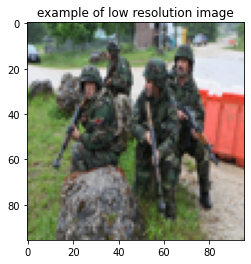

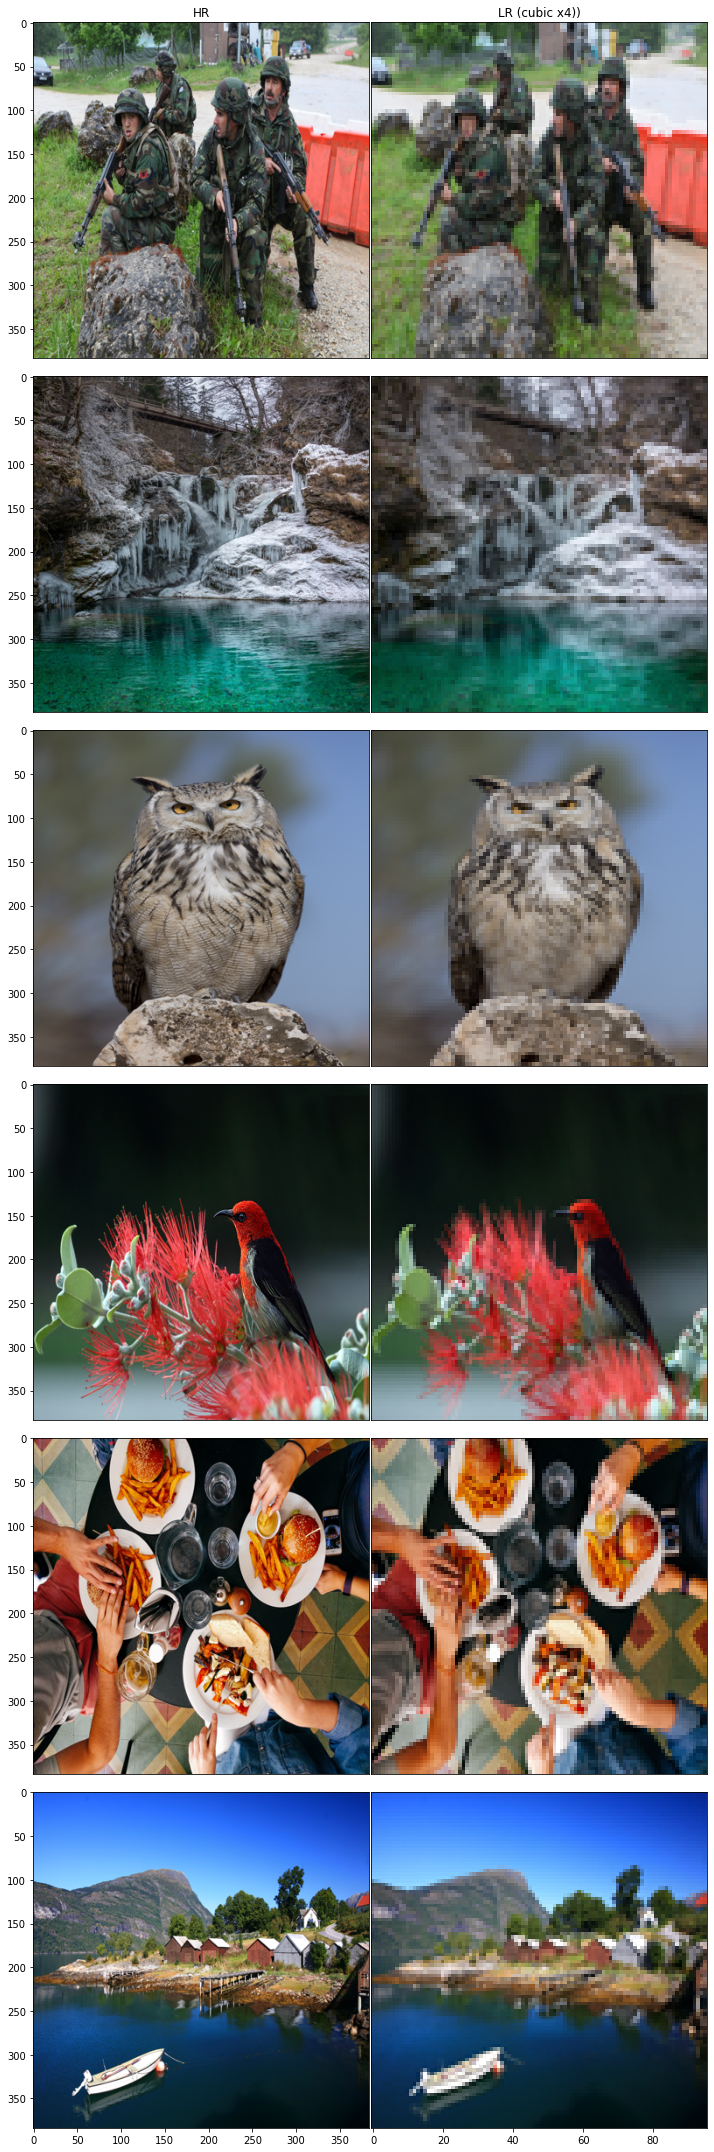

In [3]:
# inspect the dataset
inspect_data(HR_path = 'train_data/realistic_nature_100/train_HR/',
             LR_path = 'train_data/realistic_nature_100/train_LR/',
             type_end = '.png',
             sample_images = 6)

In [4]:
# arguments class for SRGAN model to make setting the parameters easier
class Args:
    '''
    arguments class for SRGAN model
    '''
    LR_path ='train_data/realistic_nature_100/train_LR/'
    GT_path = 'train_data/realistic_nature_100/train_HR/'
    res_num = 16
    num_workers = 0
    batch_size = 16
    L2_coeff = 1.0
    adv_coeff = 1e-3
    tv_loss_coeff = 0.0
    pre_train_epoch = 8000
    fine_train_epoch = 4000
    scale = 4
    patch_size = 24
    feat_layer = 'relu5_4'
    vgg_rescale_coeff = 0.006
    fine_tuning = False
    in_memory = True
    generator_path = ''
    mode = 'train'
    save_each = 0
    print_progress_interval = 0
    progress_bar = True
    save_result_images = True

In [5]:
## train the model
# create an instance of the arguments class and set the parameters for training
args = Args()

args.mode = 'train'
args.LR_path = 'train_data/realistic_nature_100/train_LR/'
args.GT_path = 'train_data/realistic_nature_100/train_HR/'
args.scale = 4

args.pre_train_epoch = 2
args.fine_train_epoch = 2
args.batch_size = 16
args.progress_bar = True
args.print_progress_interval = 500

# preTrain_loss_g, fineTuneTrain_loss_g, fineTuneTrain_loss_d = train(args)
train(args)

pre_training (training generator): 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]
fine_tune_training (training generator , and discriminator): 100%|██████████| 2/2 [00:36<00:00, 18.45s/it]


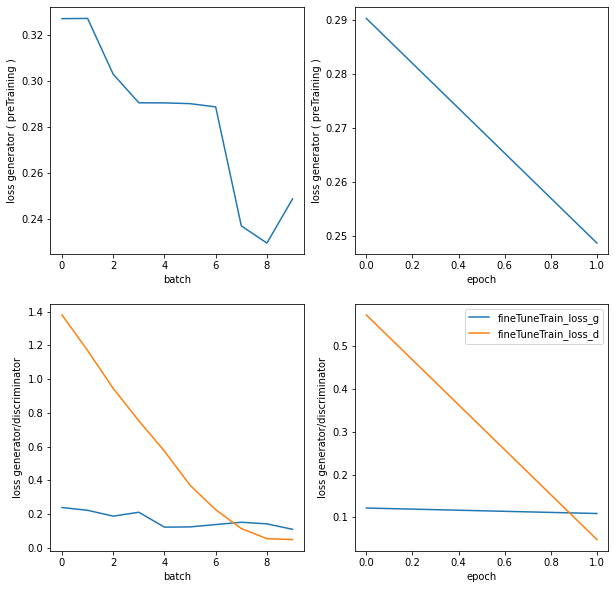

In [6]:
# plot the loss of the generator and discriminator over the training process for the pre-training and fine-tuning
# the loss is saved in a csv files in the progress_measurements folder (per batch and per epoch)

df = pd.read_csv('progress_measurements/bacth_preTrain_generator_loss.csv')
bacth_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/bacth_fineTrain_g_d_loss.csv')
bacth_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
bacth_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/epoch_preTrain_generator_loss.csv')
epoch_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/epoch_fineTrain_g_d_loss.csv')
epoch_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
epoch_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten() 


fig , axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].plot(bacth_preTrain_loss_g, label='preTrain_loss_g')
axes[0,0].set_xlabel('batch')
axes[0,0].set_ylabel('loss generator ( preTraining )')

axes[1,0].plot(bacth_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,0].plot(bacth_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,0].set_xlabel('batch')
axes[1,0].set_ylabel('loss generator/discriminator')

axes[0,1].plot(epoch_preTrain_loss_g, label='preTrain_loss_g')
axes[0,1].set_xlabel('epoch')
axes[0,1].set_ylabel('loss generator ( preTraining )')

axes[1,1].plot(epoch_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,1].plot(epoch_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,1].set_xlabel('epoch')
axes[1,1].set_ylabel('loss generator/discriminator')

plt.legend()
plt.show()

In [7]:
## test the trained model from the previous cell
# create an instance of the arguments class and set the parameters for testing
args = Args()

args.mode = 'test'
args.LR_path = 'test_data/realistic_nature_100/test_LR/'
args.GT_path = 'test_data/realistic_nature_100/test_HR/'
args.generator_path = 'model/SRGAN_gene_002.pt'

args.progress_bar = True

psnr_results , psnr_mean = test(args)

test_only (generating HR images): 10it [00:02,  3.51it/s]


PSNR mean :  15.422196633053582


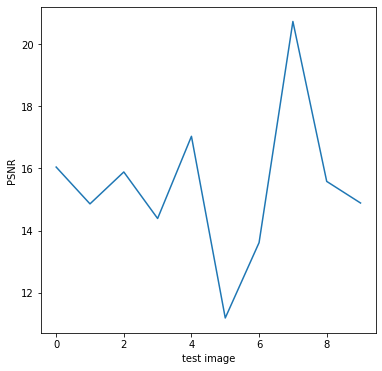

In [8]:
# plot the PSNR of the test images
print('PSNR mean : ', psnr_mean)
fig , ax = plt.subplots(figsize=(6,6))
ax.plot(psnr_results)
ax.set_xlabel('test image')
ax.set_ylabel('PSNR')
plt.show()

low resolution images : 
shapes :  [[96 96  3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


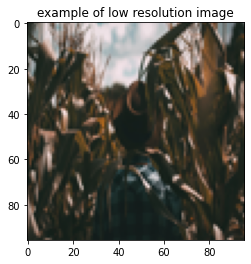

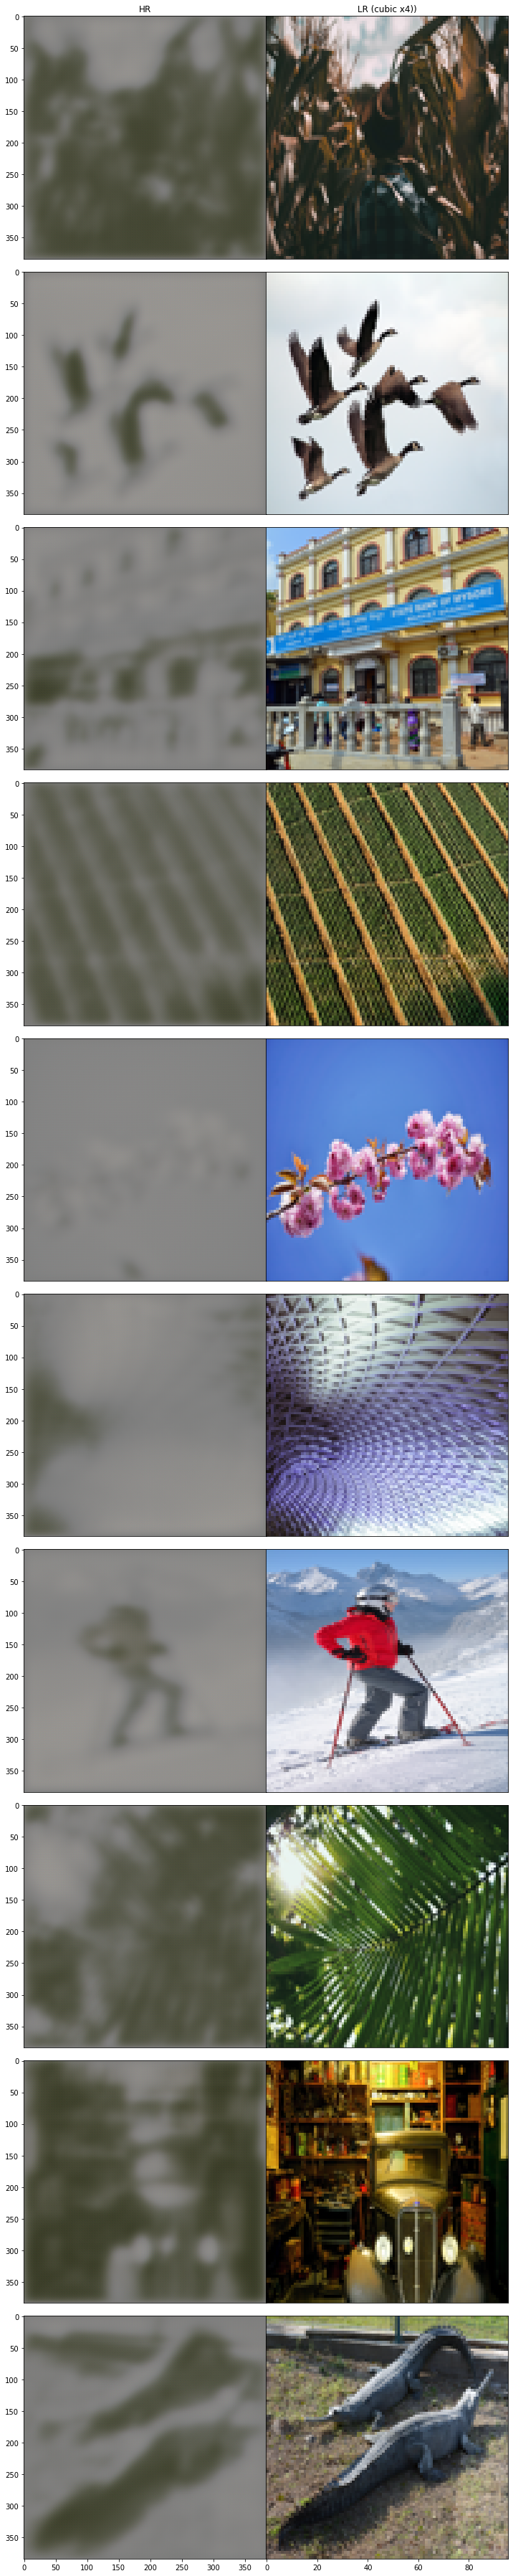

In [9]:
# plot the test and result images
inspect_data(HR_path = 'result_images/',
             LR_path = 'test_data/realistic_nature_100/test_LR/',
             type_end = '.png',
             sample_images = 10)

In [10]:
## test the a pretrained model for comparison
# create an instance of the arguments class and set the parameters for testing
args = Args()

args.mode = 'test'
args.LR_path = 'test_data/realistic_nature_100/test_LR/'
args.GT_path = 'test_data/realistic_nature_100/test_HR/'
args.generator_path = 'pretrained_models/SRGAN.pt'

args.progress_bar = True

psnr_results , psnr_mean = test(args)

test_only (generating HR images): 10it [00:02,  3.94it/s]


PSNR mean :  24.158223876412283


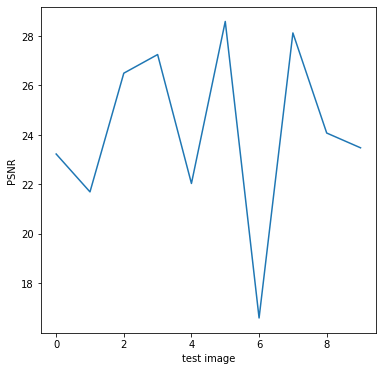

In [11]:
# plot the PSNR of the test images
print('PSNR mean : ', psnr_mean)
fig , ax = plt.subplots(figsize=(6,6))
ax.plot(psnr_results)
ax.set_xlabel('test image')
ax.set_ylabel('PSNR')
plt.show()

low resolution images : 
shapes :  [[96 96  3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


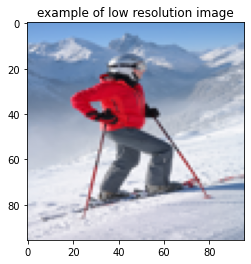

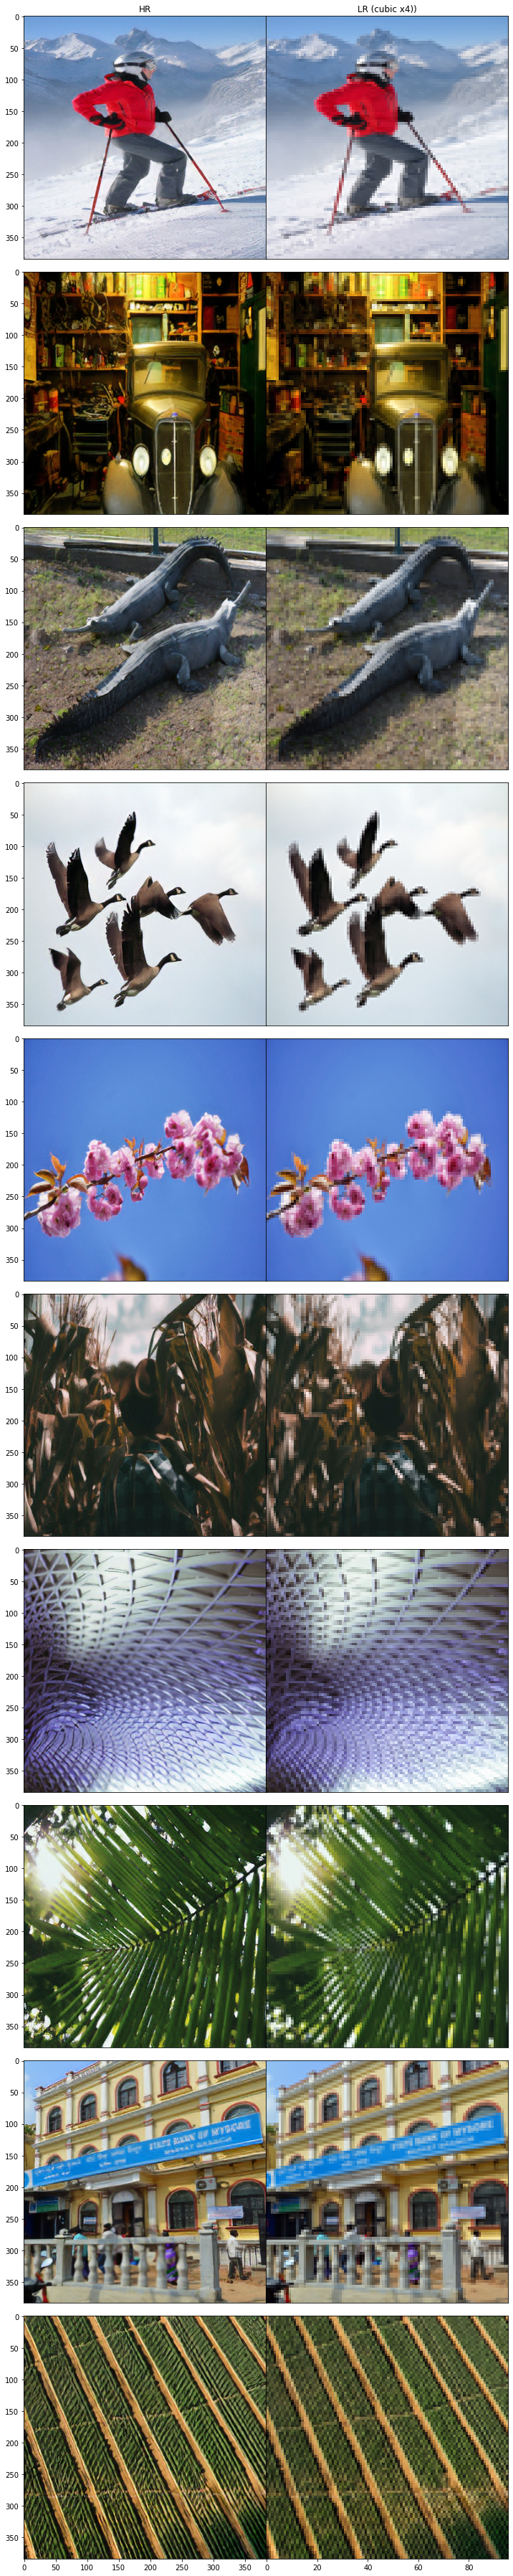

In [12]:
# plot the test and result images
inspect_data(HR_path = 'result_images/',
             LR_path = 'test_data/realistic_nature_100/test_LR/',
             type_end = '.png',
             sample_images = 10)

In [13]:
# for testing by only generating high resolution images from low resolution ones
args = Args()

args.mode = 'test'
args.LR_path = 'test_data/realistic_nature_100/test_LR/'
args.generator_path = 'pretrained_models/SRGAN.pt'

args.progress_bar = True

test_only_images(args)

test_only (generating HR images): 10it [00:02,  4.15it/s]
